In [1]:
@time include("data-processing.jl")

  0.170215 seconds (57.06 k allocations: 3.336 MiB)


truncation_hack (generic function with 1 method)

In [2]:
@time include("make-model.jl")

  0.014542 seconds (5.33 k allocations: 325.053 KiB)


test (generic function with 1 method)

In [3]:
@time include("normalize.jl")

  0.008301 seconds (2.12 k allocations: 130.622 KiB)


normdiff (generic function with 1 method)

In [4]:
@time input_data = load_stock_data(
    ["AMD", "MU", "NVDA"],
    name -> open(`uniq ../ibpont/pol_data/$name.csv`)
)

157.883221 seconds (779.10 M allocations: 77.731 GiB, 11.20% gc time)


1086283×113 TimeArray{Float64,2,DateTime,Array{Float64,2}} 2010-01-04T13:12:00 to 2020-05-19T23:59:00
│                     │ AMD_volume │ AMD_vwap │ AMD_open │ AMD_close │
├─────────────────────┼────────────┼──────────┼──────────┼───────────┤
│ 2010-01-04T13:12:00 │ 598.0      │ 9.79     │ 9.79     │ 9.79      │
│ 2010-01-04T13:29:00 │ 5965.0     │ 9.8      │ 9.8      │ 9.8       │
│ 2010-01-04T13:30:00 │ 5900.0     │ 9.771    │ 9.8      │ 9.77      │
│ 2010-01-04T13:45:00 │ 500.0      │ 9.88     │ 9.88     │ 9.88      │
│ 2010-01-04T14:07:00 │ 1200.0     │ 9.8908   │ 9.89     │ 9.89      │
│ 2010-01-04T14:09:00 │ 800.0      │ 9.8763   │ 9.88     │ 9.88      │
│ 2010-01-04T14:17:00 │ 200.0      │ 9.88     │ 9.88     │ 9.88      │
│ 2010-01-04T14:28:00 │ 10920.0    │ 9.8007   │ 9.81     │ 9.8       │
│ 2010-01-04T14:30:00 │ 442294.0   │ 9.8072   │ 9.79     │ 9.82      │
│ 2010-01-04T14:31:00 │ 127984.0   │ 9.8263   │ 9.81     │ 9.84      │
│ 2010-01-04T14:32:00 │ 119842.0   │ 9.8447   

In [5]:
@time denan!(values(input_data));

  0.118942 seconds (17.88 k allocations: 970.157 KiB)


In [6]:
@time output_data = lead(input_data[
        :AMD_close,
        :MU_close,
        :NVDA_close
        ], 1)

  0.109244 seconds (151.41 k allocations: 64.862 MiB)


1086282×3 TimeArray{Float64,2,DateTime,Array{Float64,2}} 2010-01-04T13:12:00 to 2020-05-19T23:58:00
│                     │ AMD_close │ MU_close │ NVDA_close │
├─────────────────────┼───────────┼──────────┼────────────┤
│ 2010-01-04T13:12:00 │ 9.8       │ 10.72    │ 18.34      │
│ 2010-01-04T13:29:00 │ 9.77      │ 10.72    │ 18.37      │
│ 2010-01-04T13:30:00 │ 9.88      │ 10.75    │ 18.32      │
│ 2010-01-04T13:45:00 │ 9.89      │ 10.8     │ 18.47      │
│ 2010-01-04T14:07:00 │ 9.88      │ 10.85    │ 18.5       │
│ 2010-01-04T14:09:00 │ 9.88      │ 10.86    │ 18.5       │
│ 2010-01-04T14:17:00 │ 9.8       │ 10.81    │ 18.52      │
│ 2010-01-04T14:28:00 │ 9.82      │ 10.875   │ 18.57      │
│ 2010-01-04T14:30:00 │ 9.84      │ 10.845   │ 18.54      │
│ 2010-01-04T14:31:00 │ 9.86      │ 10.83    │ 18.44      │
│ 2010-01-04T14:32:00 │ 9.84      │ 10.84    │ 18.32      │
│ 2010-01-04T14:33:00 │ 9.82      │ 10.85    │ 18.17      │
   ⋮
│ 2020-05-19T22:10:00 │ 55.55     │ 45.18    │ 353.2999

In [7]:
@time input_data = input_data[1:(length(input_data) - 1)]

  0.498201 seconds (11.06 k allocations: 945.264 MiB)


1086282×113 TimeArray{Float64,2,DateTime,Array{Float64,2}} 2010-01-04T13:12:00 to 2020-05-19T23:58:00
│                     │ AMD_volume │ AMD_vwap │ AMD_open │ AMD_close │
├─────────────────────┼────────────┼──────────┼──────────┼───────────┤
│ 2010-01-04T13:12:00 │ 598.0      │ 9.79     │ 9.79     │ 9.79      │
│ 2010-01-04T13:29:00 │ 5965.0     │ 9.8      │ 9.8      │ 9.8       │
│ 2010-01-04T13:30:00 │ 5900.0     │ 9.771    │ 9.8      │ 9.77      │
│ 2010-01-04T13:45:00 │ 500.0      │ 9.88     │ 9.88     │ 9.88      │
│ 2010-01-04T14:07:00 │ 1200.0     │ 9.8908   │ 9.89     │ 9.89      │
│ 2010-01-04T14:09:00 │ 800.0      │ 9.8763   │ 9.88     │ 9.88      │
│ 2010-01-04T14:17:00 │ 200.0      │ 9.88     │ 9.88     │ 9.88      │
│ 2010-01-04T14:28:00 │ 10920.0    │ 9.8007   │ 9.81     │ 9.8       │
│ 2010-01-04T14:30:00 │ 442294.0   │ 9.8072   │ 9.79     │ 9.82      │
│ 2010-01-04T14:31:00 │ 127984.0   │ 9.8263   │ 9.81     │ 9.84      │
│ 2010-01-04T14:32:00 │ 119842.0   │ 9.8447   

In [8]:
@time input_data = normalized_data(
    input_data,
    Dict(
        :8 => colnames(input_data),
        :64 => colnames(input_data),
    )
);

 41.411540 seconds (25.35 M allocations: 39.585 GiB, 2.50% gc time)


In [9]:
@time deext!(input_data);
input_data

  0.376847 seconds (25.27 k allocations: 1.298 MiB)


226×1086282 Array{Float32,2}:
 0.0  1.0   0.987889    -0.0182597   0.128088   …   0.00164969    0.00163264
 0.0  1.0  -1.89996      2.0         1.09909        0.382893      0.409938
 0.0  1.0   1.0          2.0         1.11111        0.379081      0.379081
 0.0  1.0  -1.9999       2.0         1.09091        0.396215      0.453047
 0.0  1.0   1.0          2.0         1.22222        0.35526       0.386663
 0.0  1.0  -1.9999       2.0         1.09091    …   0.428073      0.486108
 0.0  1.0   1.0          0.0         1.0            0.0           0.0
 0.0  1.0   0.984416    -0.0704867  -0.0671892      0.0           0.0
 0.0  0.0   2.0          0.0         0.0            0.444609      0.370508
 0.0  0.0   0.0          0.0         2.0            0.0           0.133333
 0.0  0.0   2.0          0.0         0.0        …   0.117647      0.0
 0.0  0.0   2.0          0.0         0.333333       0.1           0.1
 0.0  0.0   2.0          0.0         0.0            0.445985      0.371987
 ⋮           

In [10]:
@time output_data = normdiff(output_data, 64)

  1.685428 seconds (12.00 M allocations: 1.415 GiB, 11.60% gc time)


3×1086282 Array{Float32,2}:
  1.0  0.0   1.0      1.75758   -1.08334   …  0.396215  0.453047  0.507963
 -1.0  0.0   0.0      0.909088   0.708338     0.360657  0.360657  0.377054
  0.0  1.0  -2.66667  0.0       -0.424998     0.504558  0.527451  0.506286

In [18]:
@show mean(output_data[1, :])
@show mean(output_data[2, :])
@show mean(output_data[3, :])

mean(output_data[1, :]) = 0.3398064f0
mean(output_data[2, :]) = 0.34158847f0
mean(output_data[3, :]) = 0.34599495f0


0.34599495f0

In [12]:
@show input_size = size(input_data, 1)
@show output_size = size(output_data, 1)
@time model = StockLSTM(input_size, output_size)
@time Knet.gc()

input_size = size(input_data, 1) = 226
output_size = size(output_data, 1) = 3
  0.024860 seconds (843 allocations: 41.420 MiB)
  0.000003 seconds


In [13]:
@show total_samples = size(input_data, 2)
@assert total_samples == size(output_data, 2)
@show train_test_split = 19/20
@show train_samples = Int64(round(train_test_split * total_samples))
@show minibatch_length = 128;

total_samples = size(input_data, 2) = 1086282
train_test_split = 19 / 20 = 0.95
train_samples = Int64(round(train_test_split * total_samples)) = 1031968
minibatch_length = 128 = 128


In [14]:
@time training_data = minibatch(
    KnetArray(input_data[:, 1:train_samples]),
    KnetArray(output_data[:, 1:train_samples]),
    minibatch_length
)

  0.906354 seconds (465.62 k allocations: 925.559 MiB)


Data{Tuple{KnetArray{Float32,2},KnetArray{Float32,2}}}(K32(226,1031968)[0.0⋯], K32(3,1031968)[1.0⋯], 128, 1031968, false, 1031841, 1:1031968, false, (226, 1031968), (3, 1031968), KnetArray{Float32,2}, KnetArray{Float32,2})

In [15]:
@time testing_data = minibatch(
    KnetArray(input_data[:, train_samples:end]),
    KnetArray(output_data[:, train_samples:end]),
    minibatch_length
)

  0.042651 seconds (2.14 k allocations: 47.550 MiB)


Data{Tuple{KnetArray{Float32,2},KnetArray{Float32,2}}}(K32(226,54315)[0.9379155⋯], K32(3,54315)[0.94580483⋯], 128, 54315, false, 54188, 1:54315, false, (226, 54315), (3, 54315), KnetArray{Float32,2}, KnetArray{Float32,2})

In [16]:
@show epochs = 20;
@show length(training_data);
@show length(testing_data);

epochs = 20 = 20
length(training_data) = 8062
length(testing_data) = 424


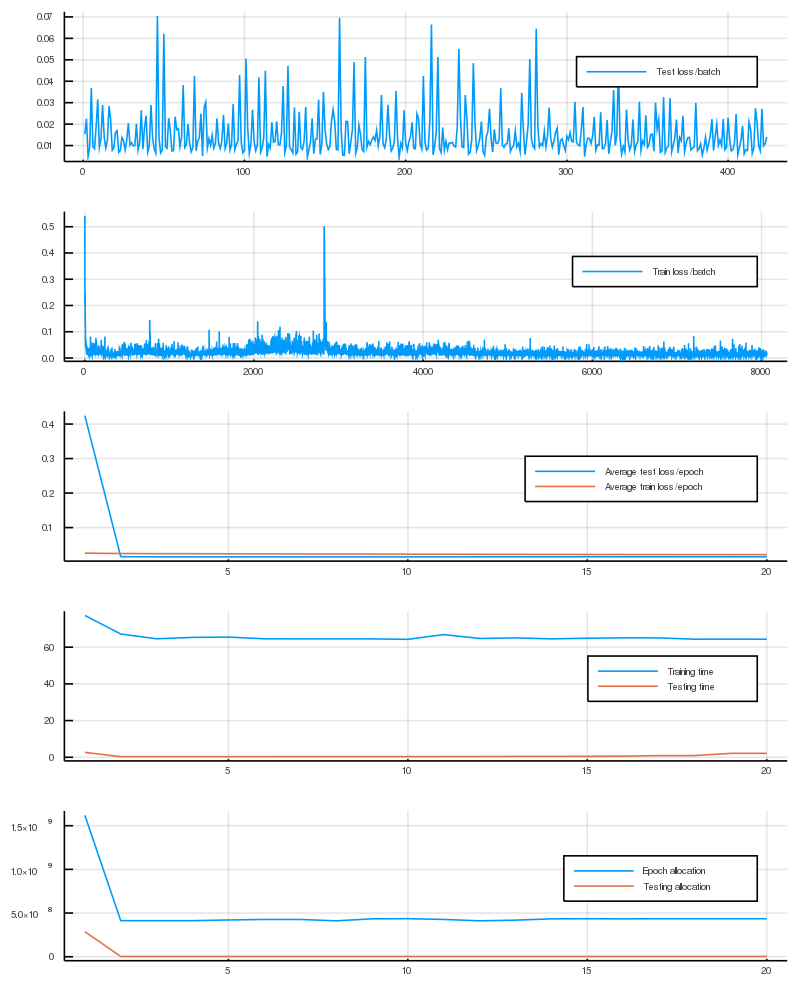

In [17]:
using Plots
using IJulia

test_losses = []
train_losses = []
avg_epoch_test_losses = []
avg_epoch_train_losses = []
epoch_train_times = []
epoch_test_times = []
epoch_train_allocs = []
epoch_test_allocs = []

function update_plots(epoch)   
    test_loss_plot = plot(test_losses; label="Test loss/batch")
    train_loss_plot = plot(train_losses; label="Train loss/batch")
    epoch_loss_plot = plot(
        [avg_epoch_test_losses, avg_epoch_train_losses], 
        label=["Average test loss/epoch" "Average train loss/epoch"]
    )
    epoch_time_plot = plot(
        [epoch_train_times, epoch_test_times],
        label=["Training time" "Testing time"]
    )
    epoch_alloc_plot = plot(
        [epoch_train_allocs, epoch_test_allocs],
        label=["Epoch allocation" "Testing allocation"]
    )
    IJulia.clear_output(true)
    plot(
        test_loss_plot, 
        train_loss_plot, 
        epoch_loss_plot,
        epoch_time_plot,
        epoch_alloc_plot
        ; 
        layout=(5, 1), size=(800, 1000)
    ) |> IJulia.display
end

for epoch in 1:epochs
    test_losses, test_time, test_alloc, _, _ = @timed test(model, testing_data)
    push!(avg_epoch_test_losses, mean(test_losses))
    push!(epoch_test_times, test_time)
    push!(epoch_test_allocs, test_alloc)
    update_plots(epoch)
    train_losses, train_time, train_alloc, _, _ = @timed train(model, training_data)
    push!(avg_epoch_train_losses, mean(train_losses))
    push!(epoch_train_times, train_time)
    push!(epoch_train_allocs, train_alloc)
    update_plots(epoch)
end

In [20]:
model(testing_data)

0.015543443f0

In [21]:
model(training_data)

0.15287033f0